In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [37]:
orders_products_details = pd.read_csv('../Information Mart/orders_products_details/orders_products_details.csv')
orders_products_details.head()

,order_id,customer_id,store_id,staff_id,item_id,product_id,product_name,brand_id,category_id,model_year,...,EGP,list_price_egp,discount,order_status,order_date,required_date,shipped_date,late_delivery,latency_days,weekend
0,1,259,1,2,1,20,Electra Townie Original 7D EQ - Women's - 2016,1,3,2016,...,47.9492,28769.040508,0.20,4,2016-01-01,2016-01-03,2016-01-03,False,0 days,True
1,2,1212,2,6,1,20,Electra Townie Original 7D EQ - Women's - 2016,1,3,2016,...,47.9492,28769.040508,0.07,4,2016-01-01,2016-01-04,2016-01-03,False,0 days,True
2,3,523,2,7,2,20,Electra Townie Original 7D EQ - Women's - 2016,1,3,2016,...,47.9492,28769.040508,0.05,4,2016-01-02,2016-01-05,2016-01-03,False,0 days,True
3,6,94,2,6,3,20,Electra Townie Original 7D EQ - Women's - 2016,1,3,2016,...,47.9492,28769.040508,0.10,4,2016-01-04,2016-01-07,2016-01-05,False,0 days,False
4,8,1204,2,7,2,20,Electra Townie Original 7D EQ - Women's - 2016,1,3,2016,...,47.9492,28769.040508,0.07,4,2016-01-04,2016-01-05,2016-01-05,False,0 days,False


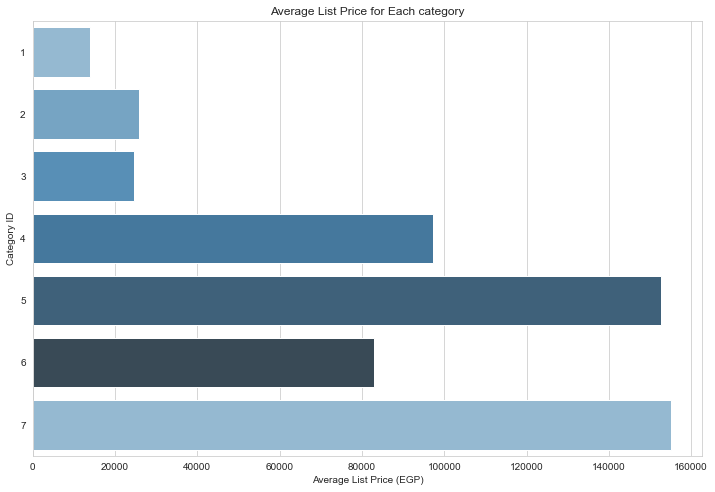

In [38]:
# Calculate average list price per product category
average_list_price_per_product = orders_products_details.groupby('category_id')['list_price_egp'].mean().reset_index()

# Sort the data by average list price in descending order
average_list_price_per_product = average_list_price_per_product.sort_values(by='list_price_egp', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='list_price_egp', y='category_id', data=average_list_price_per_product, orient='h', palette=blue_palette)
plt.title('Average List Price for Each category')
plt.xlabel('Average List Price (EGP)')
plt.ylabel('Category ID')
plt.show()

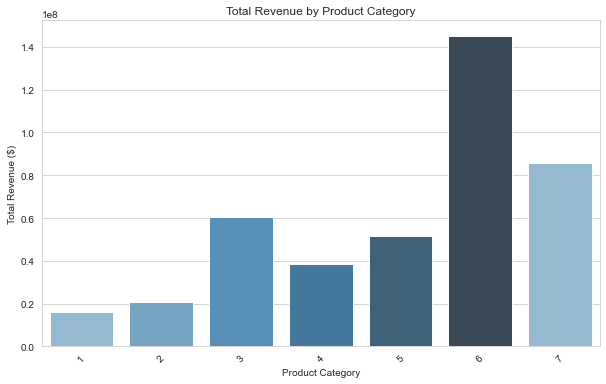

In [39]:
blue_palette = sns.color_palette("Blues_d")

# Plot the total revenue by product category
total_revenue = orders_products_details.groupby('category_id').apply(lambda x: (x['list_price_egp'] * x['quantity']).sum()).reset_index(name='total_revenue')
plt.figure(figsize=(10, 6))
sns.barplot(x='category_id', y='total_revenue', data=total_revenue, palette=blue_palette)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

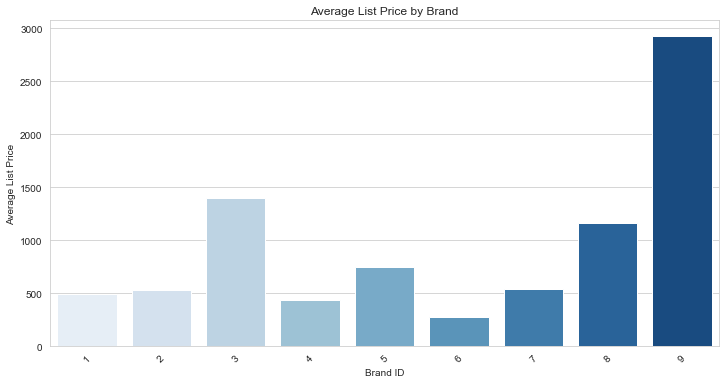

In [40]:
avg_list_price_by_brand = orders_products_details.groupby('brand_id')['list_price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_list_price_by_brand, x='brand_id', y='list_price', palette='Blues')
plt.title('Average List Price by Brand')
plt.xlabel('Brand ID')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.show()

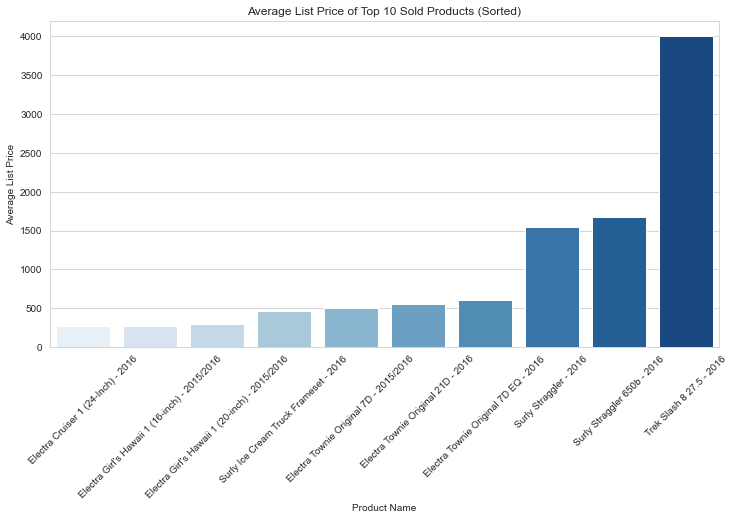

In [41]:
# Calculate total quantity sold for each product
total_quantity_sold = orders_products_details.groupby('product_name')['quantity'].sum().reset_index()

# Select top 10 sold products
top_10_sold_products = total_quantity_sold.nlargest(10, 'quantity')

# Merge with original dataframe to get corresponding list price
top_10_products_with_price = pd.merge(top_10_sold_products, orders_products_details[['product_name', 'list_price']], on='product_name', how='left')

# Calculate average list price for top 10 sold products
avg_list_price_top_10 = top_10_products_with_price.groupby('product_name')['list_price'].mean().reset_index()

# Sort the dataframe by average list price
avg_list_price_top_10 = avg_list_price_top_10.sort_values(by='list_price')  # <-- Sorting line

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_list_price_top_10, x='product_name', y='list_price', palette='Blues')
plt.title('Average List Price of Top 10 Sold Products (Sorted)')
plt.xlabel('Product Name')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.show()
